# Did AGNs supressed start formation in massive galaxies?
## Jupyter and Python for the data analysis

This is a Jupyter notebook which explains the usage of the defined functions and give examples of how to use it to build plots with the catalog data, like the following one:

In [12]:
!pip install matplotlib numpy pandas scipy astropy astroML sklearn

LoadTables


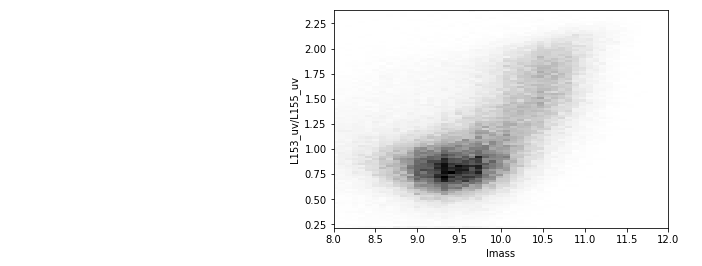

In [11]:
from loaddata import *
from filternplot import *
alldata, cndf = LoadTables()
(f1,f2,f3) = ("L153_uv","L155_uv","lmass")
fields, data = FilterByFields(alldata, "id",f1,f2,f3,"USE","star","Ks","Ks_tot")
def is1(x): return x == 1
r1 = FilterByConds(fields, data, { "USE":is1 })
r2 = FilterByFuncs(fields, r1, 
    {
        f1:lambda f, ks, kstot: -2.5*np.log10(f*kstot/ks),
        f2:lambda f, ks, kstot: -2.5*np.log10(f*kstot/ks)
    }, ["Ks","Ks_tot"])
[idx,u,v,mass,use,star,ks,ks_tot] = zip(*r2)
x = [ k for (i,j,k) in zip(u,v,mass) if not np.isnan(i+j+k)]
y = [ i-j for (i,j,k) in zip(u,v,mass) if not np.isnan(i+j+k)]
binres = (100, 100)
(xmin, xmax, ymin, ymax) = (8, 12, min(y), max(y))
plt.hist2d(x, y, bins=binres, cmap=plt.cm.Greys,zorder= 0)
plt.xlim(xmin=xmin,xmax=xmax)
plt.ylim(ymin=ymin,ymax=ymax)
plt.ylabel('%s/%s' % (f1,f2))
plt.xlabel('%s' % (f3))
plt.show()

## Usage of the Script.

This is a Jypyter notebook which explains the usage of the defined functions and give examples of how to use it to build plots with the catalog data.

As part of the results of this work are two Python3 modules which contain the functions developped for the analysis and representation of data:
 * ```loaddata``` module, containing the auxiliary functions to retrieve, filter and transform data.
 * ```filternplot```module, containing the speciffic filters and transformations used for the analysis and plotting of data in this work.
 
The first step is to import these two modules and define the size for the plots in this example:

In [22]:
from loaddata import *
from filternplot import *
matplotlib.rcParams['figure.figsize'] = [10, 8]

The UltraVISTA catalog and its ancillary data have been consolidated into a single table, saved in FITS format. The purpose of this is improving loading speed and allow to publish the catalog content along with the script into github.

The data can be loaded into memory using the loaddata function ```LoadTables```. The following line, in addition to put all the catalog data alldata variable it returns the table of data points for the stellar mass function taken from Muzzin et. al (2013b) into the cndf variable. This only has to be done once at the beginning of the notebook:

In [23]:
alldata, cndf = LoadTables()

LoadTables


The first function that has to be used is ```FilterByFields``` which extract the columns of the catalog table we are interested in, discarding the others so that the processing of data is faster. In the following example we will extract the fields L153_uv, L155_vu, and lmass that correspond with the U, V and stellar mass parameters of the catalog.

The names of the columns are those defined in each table except when names coincide, which happen in two cases:
 * z_spec in the photometric redshift tables, which has been renamed to z_spec2
 * z in the FAST computed stellar masses, which has been renamed to z_mass
 
Ancillary columns must be extracted if we need to deal with quality flags (e.g. USE or star columns) or with flux computations (e.g. Ks, Ks_tot columns), also is interesting adding always the source unique id in the catalog (id column).

In [24]:
(f1,f2,f3) = ("L153_uv","L155_uv","lmass")
fields, data = FilterByFields(alldata, "id",f1,f2,f3,"USE","star","Ks","Ks_tot")

```FilterByFields``` return the names of the selected fields, that here are put into the variable ```fields``` and the result table, what here is put in the variable ```data```.

The next functions that can be used are ```FilterbyConds``` and ```FilterByFuncs``` that can be applied to filter out and transform the resulting tables respectively.

In this case we use ```FilterByConds``` to keep only those sources for which USE=1. For that we define a condition using a Python dictionary in which for each column we indicate the filtering function to use, in this case the funciton is1 is defined simply as:

```def is1(x): return x == 1```

In [25]:
r1 = FilterByConds(fields, data, { "USE":is1 })

Now we will transform the content of the fields f1 and f2 (U and V parameters) and caclculate the log magnitudes, we ommit the zeropoint because they will be substracted later. For this we need to compute total fluxes and for this we need the help of Ks and Ks_tot parameters.

The filters are defined in a similar way to conditions, using a Python dictionary and indicating the transformating function to use in each case. Here we can indicate additional variables to input to the transformating function adding a list of names to ```FilterByFuncs.``` Each time a transformating function is called, in addition to the column value it is allocated to, all the named columns are added into the arguments.

Here instead of using a predefined transformating function we are takin advantange of the lambda feature of Python that allows to define unnamed functions in place. This is equivalent to have defined the following transfomation:
```
{
f1: transform,
f2: transform
}
```
where
```
def transform(x,y,z):
    return -2.5*np.log10(x*z/y)
```

In [26]:
r2 = FilterByFuncs(fields, r1, 
    {
        f1:lambda f, ks, kstot: -2.5*np.log10(f*kstot/ks),
        f2:lambda f, ks, kstot: -2.5*np.log10(f*kstot/ks)
    }, ["Ks","Ks_tot"])

Now we can collect the results of the filtering and transformation into separated columns with the help of the built-in ```zip``` Python function:

In [27]:
[idx,u,v,mass,use,star,ks,ks_tot] = zip(*r2)

And use the columns to prepare the plot data. In this case we need to substract the values to create the U-V axis. We use a small hack to remove some spurious data that might remain in the series.

In [28]:
x = [ k for (i,j,k) in zip(u,v,mass) if not np.isnan(i+j+k)]
y = [ i-j for (i,j,k) in zip(u,v,mass) if not np.isnan(i+j+k)]

And now its time to build the plot, which in this case is a densith map using a grey color scale.

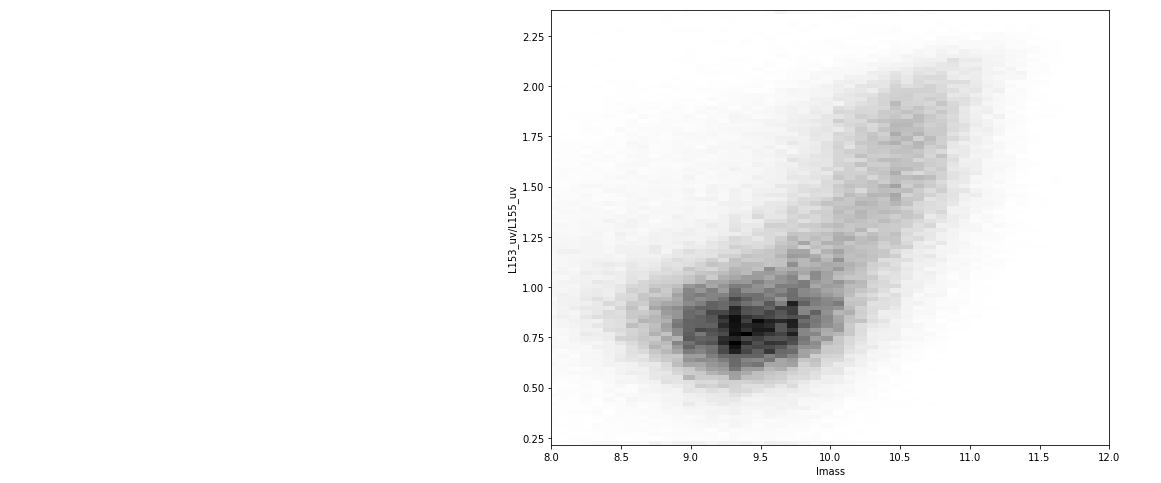

In [29]:
binres = (100, 100)
(xmin, xmax, ymin, ymax) = (8, 12, min(y), max(y))
plt.hist2d(x, y, bins=binres, cmap=plt.cm.Greys,zorder= 0)
plt.xlim(xmin=xmin,xmax=xmax)
plt.ylim(ymin=ymin,ymax=ymax)
plt.ylabel('%s/%s' % (f1,f2))
plt.xlabel('%s' % (f3))
plt.show()

Which shows the classical color bimodality present in the galaxy sample of the UltraVISTA catalog.

Putting all together, for a trivial example which reuses the catalog data loaded previously and reproduce the mass distribution of galaxys along the pre-computed redshifts, similar to the Fig TBC. of Muzzin et al. (2013b):

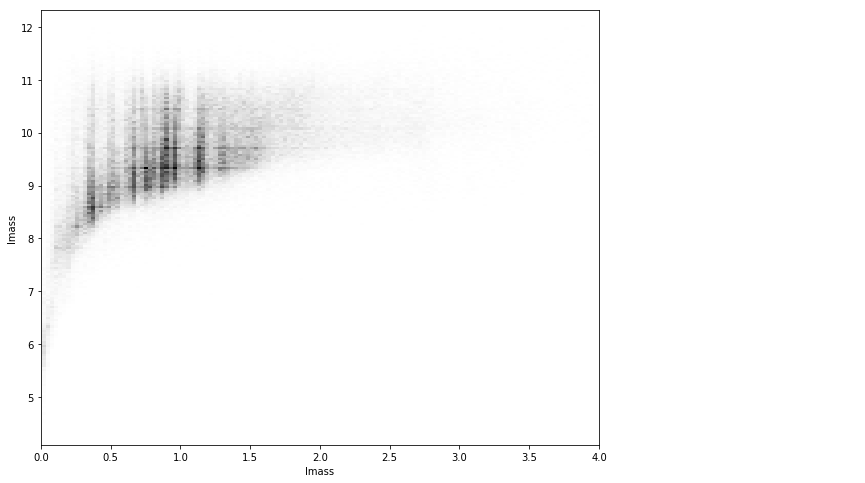

In [30]:
(f1,f2) = ("lmass","z_peak")
fields, data = FilterByFields(alldata, "id",f1,f2,"USE","star","Ks","Ks_tot")
r1 = FilterByConds(fields, data, { "USE":is1 })
[idx,v1,v2,use,star,ks,ks_tot] = zip(*r1)
binres = (200, 200)
x = [ j for (i,j) in zip(v1,v2) if not np.isnan(i+j)]
y = [ i for (i,j) in zip(v1,v2) if not np.isnan(i+j)]
(xmin, xmax, ymin, ymax) = (0, 4, min(y), max(y))
plt.hist2d(x, y, bins=binres, cmap=plt.cm.Greys, zorder=0)
plt.xlim(xmin=xmin,xmax=xmax)
plt.ylim(ymin=ymin,ymax=ymax)
plt.ylabel('%s' % (f1))
plt.xlabel('%s' % (f3))
plt.show()

The module ```filternplot``` contains the actual functions used during the work, for example the one doing the crossmatch of X-ray and UltraVISTA catalog is invoked below. In this case the X-ray catalogs are loaded from disk within the function, because the tables are relatively small and only used in this case:

begin crossmatch
All chandra and XMM 
Chandra, XMM, Total (in catalogs)
1648 1887 3535
Counter({'[XMM]': 1887, '[Chandra galaxy]': 1095, '[Chandra unobs]': 449, '[Chandra obsc]': 104})
Counter({True: 2122, False: 1413})


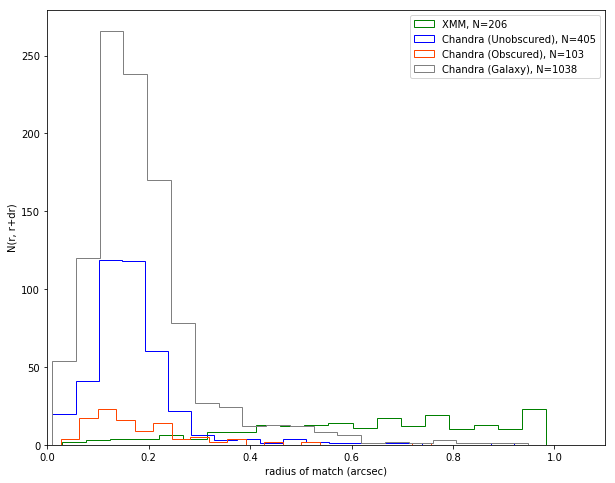

Counter({'[Chandra galaxy]': 1038, '[Chandra unobs]': 405, '[XMM]': 206, '[Chandra obsc]': 103})
Duplicates: 370
end crossmatch


In [32]:
s_cm = crossmatch(alldata, cat='all',cclass22=[])

A more complex case of an actual function defined in the ```filternplot``` module is this:

In [31]:
def irac3c(alldata, kth=None, selection=None, labelx=None, labely=None):
	print("irac3c")
	selset1 = None
	if selection is not None:
		selset0 = set(selection[0])
		if len(selection) > 1:
			print(Counter(selection[1]))
			selset1 = True

	def inselection(x): return selection is None or x in selset0
	#def selectifcolor(x): return x == 'r' or x == 'y'
	def selectioncolor(x,i): 
		if selset1 is not None:
			return selection[1][selection[0].index(i)]
		else: 
			return x

	(f1,ef1,f2,ef2,f3,ef3,f4,ef4) = ("ch1","ech1","ch2","ech2","ch3","ech3","ch4","ech4")
	if labelx is None: labelx = r'$%s/%s$' % (f1,f2)
	if labely is None: labely = r'$%s/%s$' % (f3,f4)
	fields0, data0 = FilterByFields(alldata, "id",f1,ef1,f2,ef2,f3,ef3,f4,ef4,"z_peak","USE","star","Ks","Ks_tot")
	r10 = FilterByConds(fields0, data0, {
		f1:pos,
		f2:pos,
		f3:pos,
		f4:pos,
		"Ks_tot": lambda k: kscut(k, th=kth),
		"USE":is1,
		})
	r20 = FilterByFuncs(fields0, r10, 
			{
				f1:lambda f,ks,kst,c1,e1,c2,e2,c3,e3,c4,e4: magAB(f,ks,kst)-2.78,
				f2:lambda f,ks,kst,c1,e1,c2,e2,c3,e3,c4,e4: magAB(f,ks,kst)-3.26,
				f3:lambda f,ks,kst,c1,e1,c2,e2,c3,e3,c4,e4: magAB(f,ks,kst)-3.75,
				f4:lambda f,ks,kst,c1,e1,c2,e2,c3,e3,c4,e4: magAB(f,ks,kst)-4.38,
				ef1:sn1,
				ef2:sn2,
				ef3:sn3,
				ef4:sn4,
				}, 
			["Ks","Ks_tot",f1,ef1,f2,ef2,f3,ef3,f4,ef4])
	r30 = FilterByConds(fields0, r20, {ef1:sncut, ef2:sncut, ef3:sncut, ef4:sncut})
	[idx0,log_10,e10,log_20,e20,log_30,e30,log_40,e40,zpeak0,use0,star0,ks0,ks_tot0] = zip(*r30)
	fields, data = FilterByFields(alldata, "id",f1,ef1,f2,ef2,f3,ef3,f4,ef4,"z_peak","USE","star","Ks","Ks_tot")
	r1 = FilterByConds(fields, data, {
		f1:pos,
		f2:pos,
		f3:pos,
		f4:pos, 
		"id":inselection, 
		#"Ks_tot": lambda k: kscut(k, th=kth),
		#"USE":is1, 
	})
	r2 = FilterByFuncs(fields, r1, 
			{
				f1:lambda f,ks,kst,c1,e1,c2,e2,c3,e3,c4,e4: magAB(f,ks,kst)-2.78,
				f2:lambda f,ks,kst,c1,e1,c2,e2,c3,e3,c4,e4: magAB(f,ks,kst)-3.26,
				f3:lambda f,ks,kst,c1,e1,c2,e2,c3,e3,c4,e4: magAB(f,ks,kst)-3.75,
				f4:lambda f,ks,kst,c1,e1,c2,e2,c3,e3,c4,e4: magAB(f,ks,kst)-4.38,
				ef1:sn1,
				ef2:sn2,
				ef3:sn3,
				ef4:sn4,
				}, 
			["Ks","Ks_tot",f1,ef1,f2,ef2,f3,ef3,f4,ef4])
	r3 = FilterByConds(fields, r2, {ef1:sncut, ef2:sncut, ef3:sncut, ef4:sncut})
	r4 = FilterByFuncs(fields, r3, {"star":selectioncolor}, ["id"])
	[idx,log_1,e1,log_2,e2,log_3,e3,log_4,e4,zpeak,use,star,ks,ks_tot] = zip(*r4)
	ntot = len(idx)
	print("Ntot=%d" % ntot)

	l12 = [ i-j for (i,j) in zip(log_1,log_2)]
	l34 = [ i-j for (i,j) in zip(log_3,log_4)]

	fig, axis = plt.subplots(2,3)
	binres = (100, 100)
	zbins = [ 
			{"z0":0.2, "z1":0.5, "ax":[0,0], "y0":0.69},
			{"z0":0.5, "z1":1.0, "ax":[0,1], "y0":0.59},
			{"z0":1.0, "z1":1.5, "ax":[0,2], "y0":0.49},
			{"z0":1.5, "z1":2.0, "ax":[1,0], "y0":0.49},
			{"z0":2.0, "z1":2.5, "ax":[1,1], "y0":0.49},
			{"z0":2.5, "z1":3.0, "ax":[1,2], "y0":0.49}
			]	
	for b in zbins:
		ax = axis[b["ax"][0],b["ax"][1]]
		y0 = [ i-j for (i,j,k,l,z) in zip(log_10,log_20,log_30,log_40,zpeak0) if 
				not np.isnan(i+j+k+l) and z >= b["z0"] and z < b["z1"]]
		x0 = [ k-l for (i,j,k,l,z) in zip(log_10,log_20,log_30,log_40,zpeak0) if
				not np.isnan(i+j+k+l) and z >= b["z0"] and z < b["z1"]]
		#ax.hist2d(x0, y0, bins=binres, cmap=plt.cm.Greys,zorder= 0)
		if not selset1:
			y = [ i for (i,j,z) in zip(l12,use,zpeak) if 
					z >= b["z0"] and z < b["z1"]]
			x = [ i for (i,j,z) in zip(l34,use,zpeak) if 
					z >= b["z0"] and z < b["z1"]]
			c = [ j for (i,j,z) in zip(l34,star,zpeak) if
					z >= b["z0"] and z < b["z1"]]
			ax.scatter(x, y, marker='.', c=c, edgecolors="none", alpha=0.5)
				#ax.scatter(x, y, marker='.', c='b', edgecolors='none')
		else:
			for k in mycolors.keys():
				y = [ i for (i,j,z) in zip(l12,star,zpeak) if 
						j == k  and z >= b["z0"] and z < b["z1"]]
				x = [ i for (i,j,z) in zip(l34,star,zpeak) if 
						j == k  and z >= b["z0"] and z < b["z1"]]
				if len(x) > 0:
					ax.scatter(x, y, marker=mycolors[k][2], c=mycolors[k][0], edgecolors='none', label=mycolors[k][1], alpha=0.8)
					#ax.scatter(x, y, marker='.', c=mycolors[k][0], edgecolors='none', label=mycolors[k][1])
		ax.set_title(r'$%.1f\leq z<%.1f$' % (b["z0"],b["z1"]))
		legend = ax.legend(loc='lower right', fontsize='small', shadow=True)
		ax.axis([-1.0,3.5,-0.4,1.5])
		ax.set_xlabel("[5.8]-[8.0] (Vega)")
		ax.set_ylabel("[3.6]-[4.5] (Vega)")
		ax.plot([0.6, 0.6], [0.3,1.5], color='darkgray', linestyle='-', lw=2)
		ax.plot([0.6, 1.6], [0.3,0.5], color='darkgray', linestyle='-', lw=2)
		ax.plot([1.6, 2.0], [0.5,1.5], color='darkgray', linestyle='-', lw=2)
	plt.show()
	selection = [ i for (i,j) in zip(idx,use) if j == '.' ]
	print("selection=%d" % len(selection))
	return [selection, ] 

Which can be fed with the output from other function, for example the crossmatch results above:

irac3c
Counter({'[Chandra galaxy]': 1038, '[Chandra unobs]': 405, '[XMM]': 206, '[Chandra obsc]': 103})
Ntot=998


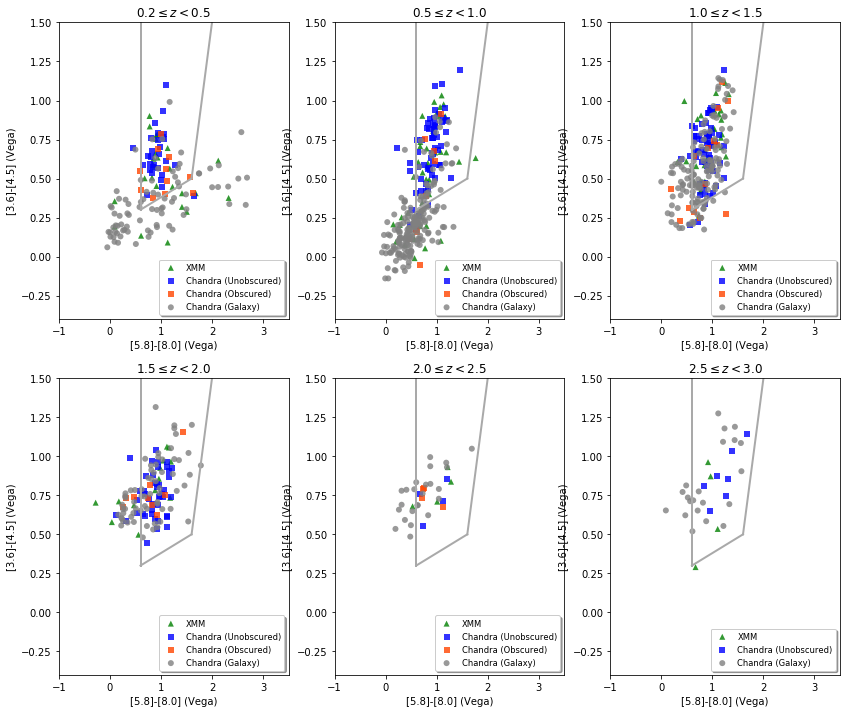

selection=0


In [33]:
matplotlib.rcParams['figure.figsize'] = [14, 12]
s2 = irac3c(alldata, selection=s_cm)